### На всякий случай оставила иерархическую кластеризацию тоже, чтоб было, с чем сравнить. Если неинтересно смотреть, можно сразу отмотать на середину ноутбука))

In [292]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [293]:
os.chdir("C:/Users/79502/Downloads/Lect_04/Lect_04/задача_2_Economics of Cities/")

In [294]:
df = pd.read_csv("Econom_Cities_data.csv", sep=";", decimal=',', index_col='City')

In [295]:
# Смотрим первые строки, всё ли нормально считалось


df.head()

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5


In [296]:
# Данных не очень много, распечатаем всё (вдруг, пригодится для интерпретации результатов)

print(df)

                Work  Price  Salary
City                               
Amsterdam       1714   65.6    49.0
Athens          1792   53.8    30.4
Bogota          2152   37.9    11.5
Bombay          2052   30.3     5.3
Brussels        1708   73.8    50.5
Buenos_Aires    1971   56.1    12.5
Cairo          -9999   37.1 -9999.0
Caracas         2041   61.0    10.9
Chicago         1924   73.9    61.9
Copenhagen      1717   91.3    62.9
Dublin          1759   76.0    41.4
Dusseldorf      1693   78.5    60.2
Frankfurt       1650   74.5    60.4
Geneva          1880   95.9    90.3
Helsinki        1667  113.6    66.6
Hong_Kong       2375   63.8    27.8
Houston         1978   71.9    46.3
Jakarta        -9999   43.6 -9999.0
Johannesburg    1945   51.1    24.0
Kuala_Lumpur    2167   43.5     9.9
Lagos           1786   45.2     2.7
Lisbon          1742   56.2    18.8
London          1737   84.2    46.2
Los_Angeles     2068   79.8    65.2
Luxembourg      1768   71.1    71.1
Madrid          1710   93.8 

In [297]:
from sklearn import preprocessing

# Данные далеко не нормированы, столбцы сильно отличаются. Нужна стандартизация.
# Какую лучше выбрать? Попробуем сделать всё и сравнить. 

stand_1 = preprocessing.StandardScaler()
stand_2 = preprocessing.MaxAbsScaler()
stand_3 = preprocessing.MinMaxScaler()

# вычисляем параметры стандартизации
stand_1.fit(df)
stand_2.fit(df)
stand_3.fit(df)
# преобразуем данные
X1 = stand_1.transform(df)
X2 = stand_2.transform(df)
X3 = stand_3.transform(df)
# Получаем объекты X -- матрицы класса numpy.ndarray.
# Преобразуем её в объекты класса pandas.DataFrame.
X1 = pd.DataFrame(X1, index=df.index, columns=df.columns)
X2 = pd.DataFrame(X2, index=df.index, columns=df.columns)
X3 = pd.DataFrame(X3, index=df.index, columns=df.columns)

In [298]:
# просто посмотрим,что вышло в одной строке
print(X1.loc["Zurich"])

Work      0.202983
Price     1.444554
Salary    0.238635
Name: Zurich, dtype: float64


In [299]:
# просто посмотрим,что вышло
print(X2.loc["Zurich"])

Work      0.186819
Price     0.865801
Salary    0.010001
Name: Zurich, dtype: float64


In [300]:
# просто посмотрим,что вышло
print(X3.loc["Zurich"])

Work      0.959027
Price     0.818075
Salary    1.000000
Name: Zurich, dtype: float64


Получились совершенно разные значения, посмотрим, повлияет ли это на результаты кластеризации.

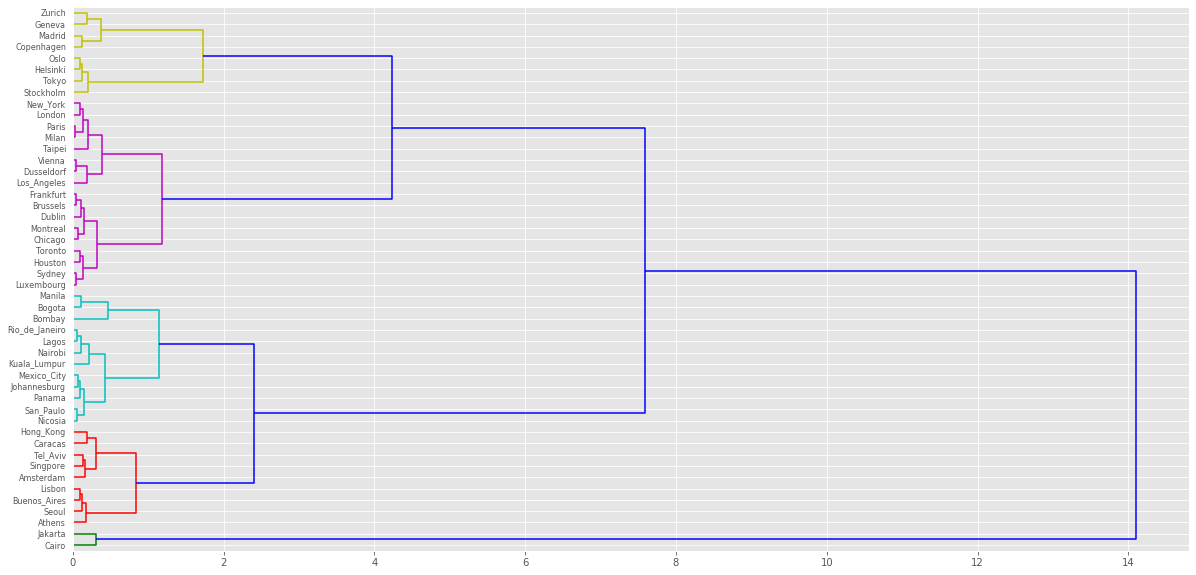

In [301]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

link1 = linkage(X1, 'ward', 'euclidean')
fig1 = plt.figure(figsize=(20,10))
dn1 = dendrogram(link, labels=X.index.tolist(), color_threshold=2,orientation = "right")

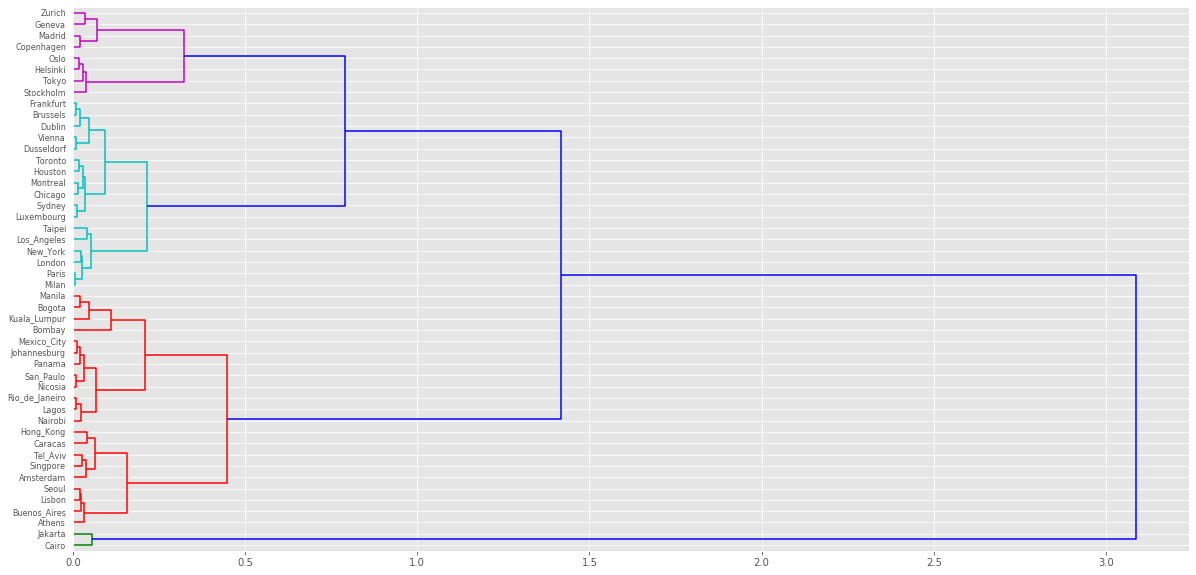

In [302]:
link2 = linkage(X2, 'ward', 'euclidean')
fig2 = plt.figure(figsize=(20,10))
dn2 = dendrogram(link2, labels=X.index.tolist(), color_threshold=0.7,orientation = "right")

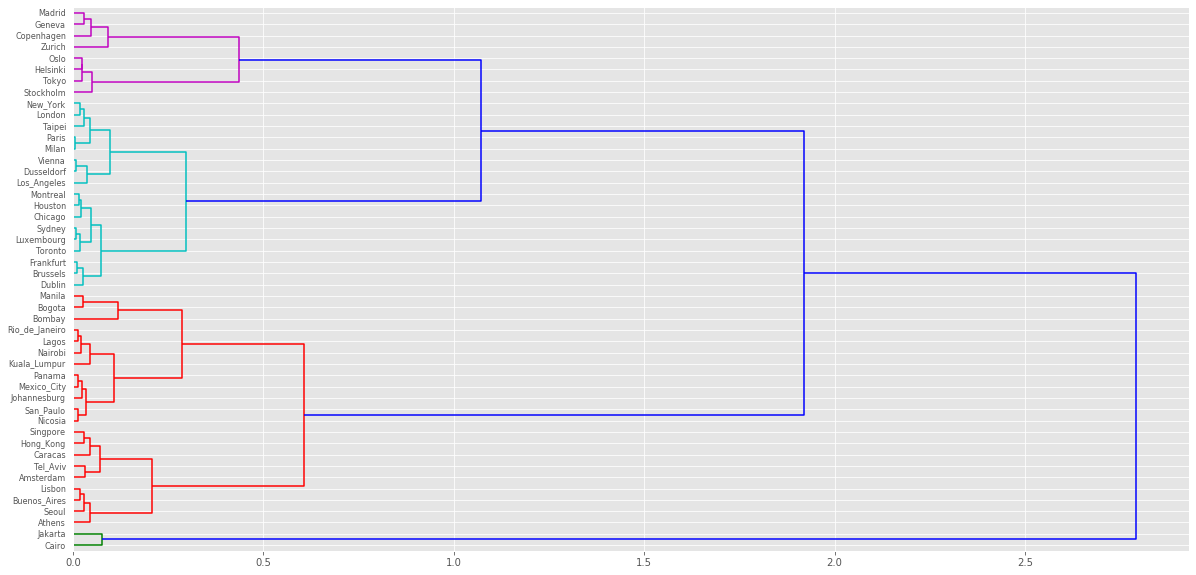

In [303]:
link3 = linkage(X3, 'ward', 'euclidean')
fig3 = plt.figure(figsize=(20,10))
dn3 = dendrogram(link3, labels=X.index.tolist(), color_threshold=0.7,orientation = "right")

In [304]:
dist1 = link1[:, 2]
dist2 = link2[:, 2]
dist3 = link3[:, 2]

Text(22, 1.5, '5 clusters')

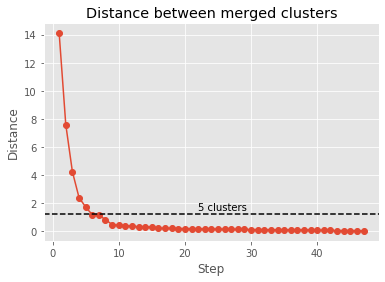

In [305]:
dist_rev1 = dist1[::-1]
idxs = range(1, len(dist1) + 1)
plt.plot(idxs, dist_rev1, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(1.2, c='k', linestyle='dashed')
plt.text(22, 1.5, '5 clusters')

Text(22, 0.3, '5 clusters')

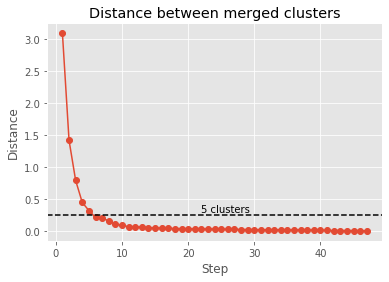

In [306]:
dist_rev2 = dist2[::-1]
idxs = range(1, len(dist2) + 1)
plt.plot(idxs, dist_rev2, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(0.25, c='k', linestyle='dashed')
plt.text(22, 0.3, '5 clusters')

Text(22, 0.4, '5 clusters')

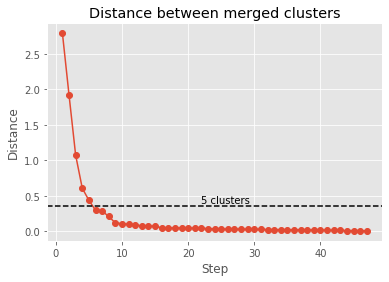

In [307]:
dist_rev3 = dist3[::-1]
idxs = range(1, len(dist3) + 1)
plt.plot(idxs, dist_rev3, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(0.35, c='k', linestyle='dashed')
plt.text(22, 0.4, '5 clusters')

In [308]:
df['cluster1'] = fcluster(link1, 5, criterion='maxclust')
df['cluster2'] = fcluster(link2, 5, criterion='maxclust')
df['cluster3'] = fcluster(link3, 5, criterion='maxclust')

In [309]:
print(df)

                Work  Price  Salary  cluster1  cluster2  cluster3
City                                                             
Amsterdam       1714   65.6    49.0         2         2         2
Athens          1792   53.8    30.4         2         2         2
Bogota          2152   37.9    11.5         3         3         3
Bombay          2052   30.3     5.3         3         3         3
Brussels        1708   73.8    50.5         4         4         4
Buenos_Aires    1971   56.1    12.5         2         2         2
Cairo          -9999   37.1 -9999.0         1         1         1
Caracas         2041   61.0    10.9         2         2         2
Chicago         1924   73.9    61.9         4         4         4
Copenhagen      1717   91.3    62.9         5         5         5
Dublin          1759   76.0    41.4         4         4         4
Dusseldorf      1693   78.5    60.2         4         4         4
Frankfurt       1650   74.5    60.4         4         4         4
Geneva    

In [310]:
del df["cluster2"]
del df["cluster3"]

Вывод: номера кластеров совпадают во всех строках, тип стандартизации почти не повлиял на результат. Дендрограммы и каменистые осыпи слабо отличались друг от друга, а итоговое разбиение на 5 кластеров не отличается вообще. Правда, при разбиении на большее количество кластеров разница была бы, что видно из дендрограмм.
Стоит попробовать изменить другие параметры. Но пока интерпретируем результат для 5 кластеров.

In [311]:
df['cluster1'].sort_values()

City
Jakarta           1
Cairo             1
Hong_Kong         2
Seoul             2
Singpore          2
Lisbon            2
Caracas           2
Amsterdam         2
Athens            2
Buenos_Aires      2
Tel_Aviv          2
Johannesburg      3
Panama            3
Nicosia           3
Nairobi           3
Manila            3
Lagos             3
Kuala_Lumpur      3
Rio_de_Janeiro    3
Mexico_City       3
San_Paulo         3
Bombay            3
Bogota            3
Sydney            4
Taipei            4
Toronto           4
New_York          4
Paris             4
Montreal          4
Los_Angeles       4
Frankfurt         4
Luxembourg        4
Vienna            4
Brussels          4
London            4
Houston           4
Chicago           4
Milan             4
Dusseldorf        4
Dublin            4
Tokyo             5
Copenhagen        5
Madrid            5
Geneva            5
Helsinki          5
Oslo              5
Stockholm         5
Zurich            5
Name: cluster1, dtype: int32

In [312]:
df.groupby('cluster1').mean()

,Work,Price,Salary
cluster1,,,
1,-9999.000000,40.350000,-9999.000000
2,1948.222222,60.722222,25.022222
3,1981.666667,44.591667,11.050000
4,1826.588235,76.858824,54.152941
5,1763.750000,104.550000,67.587500


Интерпретация.

Кластер 5 - большая зарплата, не очень много часов работы - особо не упахиваешься, очень высокие цены - это города с самым высоким уровнем жизни, где комфортно жить и работать, но дорого туда приезжать.

Кластер 4 - ещё высокая зарплата, часов работы уже больше, зато цены относительно зарплаты сильнее упали в сравнении с кластером 5. Это крупные города и столицы развитых стран. 

Кластер 3 - очень печальное место, работаешь очень много, зарплаты низкие, цены, конечно, тоже ниже, но не так сильно относительно зарплаты. Города, в которых лучше не жить... 

Кластер 2 - средние города средненьких стран: зарплаты так себе, цены тоже. 

Кластер 1 - вероятно, выбросы. 

In [313]:
# Попробуем кластеризовать с помощью KMeans.
from sklearn.cluster import KMeans
# инициализация модели
model = KMeans(n_clusters=5, random_state=42, max_iter=300, n_init=10, verbose=0 )
# random_state - зерно датчика случайных чисел. 
# При повторном вызове с тем же значением зерна random_state 
# модель будет давать одинаковые результаты.

In [314]:
# подгонка модели по данным из df
model.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

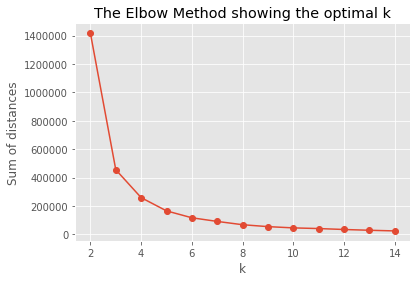

In [315]:
K = range(2, 15)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [316]:
model = KMeans(n_clusters=5)
model.fit(X)
df['cluster'] = model.labels_ + 1  # прибавила 1,чтоб начиналось с 1, а не с 0.
df.groupby('cluster').mean()


,Work,Price,Salary,cluster1
cluster,,,,
1,1882.642857,69.785714,44.928571,3.285714
2,-9999.000000,40.350000,-9999.000000,1.000000
3,1945.437500,47.468750,14.187500,2.750000
4,1835.363636,84.790909,56.872727,4.272727
5,1760.600000,111.080000,67.500000,5.000000


In [317]:
df.groupby('cluster').size()

cluster
1    14
2     2
3    16
4    11
5     5
dtype: int64

In [318]:
# Прошлая табличка для сравнения. По последнему столбику видно, что некоторые города переползли в другие кластеры.
# Но основное направление разбиения не изменилось.
df.groupby('cluster1').mean()

,Work,Price,Salary,cluster
cluster1,,,,
1,-9999.000000,40.350000,-9999.000000,2.000000
2,1948.222222,60.722222,25.022222,1.888889
3,1981.666667,44.591667,11.050000,3.000000
4,1826.588235,76.858824,54.152941,2.411765
5,1763.750000,104.550000,67.587500,4.625000


In [320]:
df['cluster'].sort_values()

City
Amsterdam         1
Montreal          1
Luxembourg        1
Singpore          1
Hong_Kong         1
Sydney            1
Frankfurt         1
Tel_Aviv          1
Dublin            1
Houston           1
Chicago           1
Caracas           1
Brussels          1
Toronto           1
Cairo             2
Jakarta           2
Nairobi           3
Athens            3
Rio_de_Janeiro    3
Mexico_City       3
Manila            3
San_Paulo         3
Bogota            3
Lisbon            3
Bombay            3
Lagos             3
Kuala_Lumpur      3
Johannesburg      3
Nicosia           3
Buenos_Aires      3
Seoul             3
Panama            3
Taipei            4
Paris             4
Los_Angeles       4
New_York          4
Milan             4
Madrid            4
Vienna            4
London            4
Geneva            4
Dusseldorf        4
Copenhagen        4
Stockholm         5
Helsinki          5
Tokyo             5
Oslo              5
Zurich            5
Name: cluster, dtype: int32

Получилось очень похожее распределение с даже еще более приятной интерпретацией. Например, Мадрид попал в группу "Города и столицы развитых стран". Зато в "Города с высочайшим уровнем жизни" - 5 кластер, остались только города из стран-лидеров по уровню жизни (Япония, Швеция, Швейцария и тп).

Итог:

1 кластер - "среднячки"
2 кластер - странные выбросы
3 кластер - печальное место, им есть, к чему стремиться.
4 кластер - города и столицы развитых стран
5 кластер - высочайший уровени жизни.

Вот, пожалуй, лучшее и итоговое разбиение на кластеры.

In [321]:
# Попробуем разбить на большее количество кластеров. На меньшее не имеет смысла, судя по каменистой осыпи
model2 = KMeans(n_clusters=6)
model2.fit(X)
df['cluster'] = model2.labels_ + 1  # прибавила 1,чтоб начиналось с 1, а не с 0.
df.groupby('cluster').mean()

,Work,Price,Salary,cluster1
cluster,,,,
1,1835.363636,84.790909,56.872727,4.272727
2,-9999.000000,40.350000,-9999.000000,1.000000
3,1874.000000,50.650000,16.358333,2.666667
4,1882.642857,69.785714,44.928571,3.285714
5,1760.600000,111.080000,67.500000,5.000000
6,2159.750000,37.925000,7.675000,3.000000


In [322]:
df.groupby('cluster').size()

cluster
1    11
2     2
3    12
4    14
5     5
6     4
dtype: int64

In [323]:
df['cluster'].sort_values()

City
Los_Angeles       1
Madrid            1
New_York          1
Vienna            1
London            1
Paris             1
Geneva            1
Dusseldorf        1
Copenhagen        1
Milan             1
Taipei            1
Cairo             2
Jakarta           2
Seoul             3
Nairobi           3
Athens            3
Lisbon            3
Lagos             3
Nicosia           3
Panama            3
Buenos_Aires      3
Mexico_City       3
San_Paulo         3
Johannesburg      3
Rio_de_Janeiro    3
Singpore          4
Tel_Aviv          4
Toronto           4
Sydney            4
Amsterdam         4
Dublin            4
Luxembourg        4
Brussels          4
Houston           4
Hong_Kong         4
Caracas           4
Frankfurt         4
Montreal          4
Chicago           4
Tokyo             5
Zurich            5
Helsinki          5
Oslo              5
Stockholm         5
Bombay            6
Kuala_Lumpur      6
Bogota            6
Manila            6
Name: cluster, dtype: int32

Видно, что кластер с печальными городами разделился на просто печальные и очень печальные, в которых среднее число рабочих часов возросло, а зарплата упала. Не знаю, имеет ли смысл такое разделение. Мне кажется, что нет.
Но на всякий случай попрорбуем еще увеличить число кластеров.

In [324]:
# Попробуем разбить на большее количество кластеров
model3 = KMeans(n_clusters=7)
model3.fit(X)
df['cluster'] = model3.labels_ + 1  # прибавила 1,чтоб начиналось с 1, а не с 0.
df.groupby('cluster').mean()

,Work,Price,Salary,cluster1
cluster,,,,
1,1882.642857,69.785714,44.928571,3.285714
2,1874.000000,50.650000,16.358333,2.666667
3,-9999.000000,40.350000,-9999.000000,1.000000
4,1860.250000,81.462500,52.800000,4.000000
5,1760.600000,111.080000,67.500000,5.000000
6,2159.750000,37.925000,7.675000,3.000000
7,1769.000000,93.666667,67.733333,5.000000


In [325]:
df.groupby('cluster').size()

cluster
1    14
2    12
3     2
4     8
5     5
6     4
7     3
dtype: int64

In [326]:
df['cluster'].sort_values()

City
Amsterdam         1
Luxembourg        1
Houston           1
Montreal          1
Singpore          1
Frankfurt         1
Sydney            1
Dublin            1
Hong_Kong         1
Caracas           1
Brussels          1
Tel_Aviv          1
Toronto           1
Chicago           1
San_Paulo         2
Mexico_City       2
Nicosia           2
Panama            2
Athens            2
Rio_de_Janeiro    2
Lisbon            2
Nairobi           2
Johannesburg      2
Seoul             2
Buenos_Aires      2
Lagos             2
Jakarta           3
Cairo             3
Paris             4
New_York          4
Taipei            4
Los_Angeles       4
Vienna            4
London            4
Dusseldorf        4
Milan             4
Oslo              5
Helsinki          5
Stockholm         5
Tokyo             5
Zurich            5
Manila            6
Kuala_Lumpur      6
Bombay            6
Bogota            6
Madrid            7
Geneva            7
Copenhagen        7
Name: cluster, dtype: int32

Тут разделились города развитых стран. На тех, где зарплата и цены побольше, а часов работы поменьше (см.в таблице средние значения 7го и 4го кластера). Разница уже несущественна и такое разбиение не имеет смысла.
Пожалуй, лучшим было разбиение на 5 кластеров.
Но можно ещё для интереса разбить на меньшее количество кластеров.

In [327]:
# Попробуем разбить на меньшее количество кластеров
model4 = KMeans(n_clusters=4)
model4.fit(X)
df['cluster'] = model4.labels_ + 1  # прибавила 1,чтоб начиналось с 1, а не с 0.
df.groupby('cluster').mean()

,Work,Price,Salary,cluster1
cluster,,,,
1,1812.000000,93.006250,60.193750,4.500000
2,-9999.000000,40.350000,-9999.000000,1.000000
3,1945.437500,47.468750,14.187500,2.750000
4,1882.642857,69.785714,44.928571,3.285714


In [328]:
df['cluster'].sort_values()

City
Los_Angeles       1
Tokyo             1
Taipei            1
Stockholm         1
Paris             1
Oslo              1
New_York          1
Milan             1
Madrid            1
Vienna            1
London            1
Helsinki          1
Geneva            1
Zurich            1
Dusseldorf        1
Copenhagen        1
Jakarta           2
Cairo             2
Athens            3
Bogota            3
Bombay            3
Seoul             3
San_Paulo         3
Rio_de_Janeiro    3
Panama            3
Buenos_Aires      3
Nicosia           3
Nairobi           3
Lagos             3
Manila            3
Johannesburg      3
Lisbon            3
Mexico_City       3
Kuala_Lumpur      3
Toronto           4
Hong_Kong         4
Tel_Aviv          4
Houston           4
Sydney            4
Caracas           4
Brussels          4
Dublin            4
Luxembourg        4
Chicago           4
Frankfurt         4
Montreal          4
Singpore          4
Amsterdam         4
Name: cluster, dtype: int32

Получили распределение: крутые города, средние города, ужасные города, странные выбросы. 
Если оставим три кластера, получим: города, в которых можно жить, города, в которых лучше не жить, и выбросы.
В зависимости от применения результатов кластеризации, может иметь место любое разбиение от 3 до 7. Но на мой взгляд, самым интересным является разделение на 5 кластеров. 

In [352]:
df['cluster_n'].sort_values()

City
Jakarta           1
Cairo             1
Oslo              2
Tokyo             2
Helsinki          2
Stockholm         2
Zurich            3
Geneva            3
Copenhagen        3
Madrid            3
Seoul             4
San_Paulo         4
Mexico_City       4
Sydney            4
Taipei            4
Paris             4
Panama            4
Tel_Aviv          4
Toronto           4
Nicosia           4
New_York          4
Nairobi           4
Montreal          4
Milan             4
Singpore          4
Rio_de_Janeiro    4
Amsterdam         4
Luxembourg        4
Athens            4
Bogota            4
Brussels          4
Buenos_Aires      4
Caracas           4
Chicago           4
Dublin            4
Manila            4
Dusseldorf        4
Hong_Kong         4
Houston           4
Johannesburg      4
Kuala_Lumpur      4
Lagos             4
Lisbon            4
London            4
Vienna            4
Frankfurt         4
Los_Angeles       4
Bombay            5
Name: cluster_n, dtype: int32